<a href="https://colab.research.google.com/github/udayameister/Multimodel_GNN/blob/main/result_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

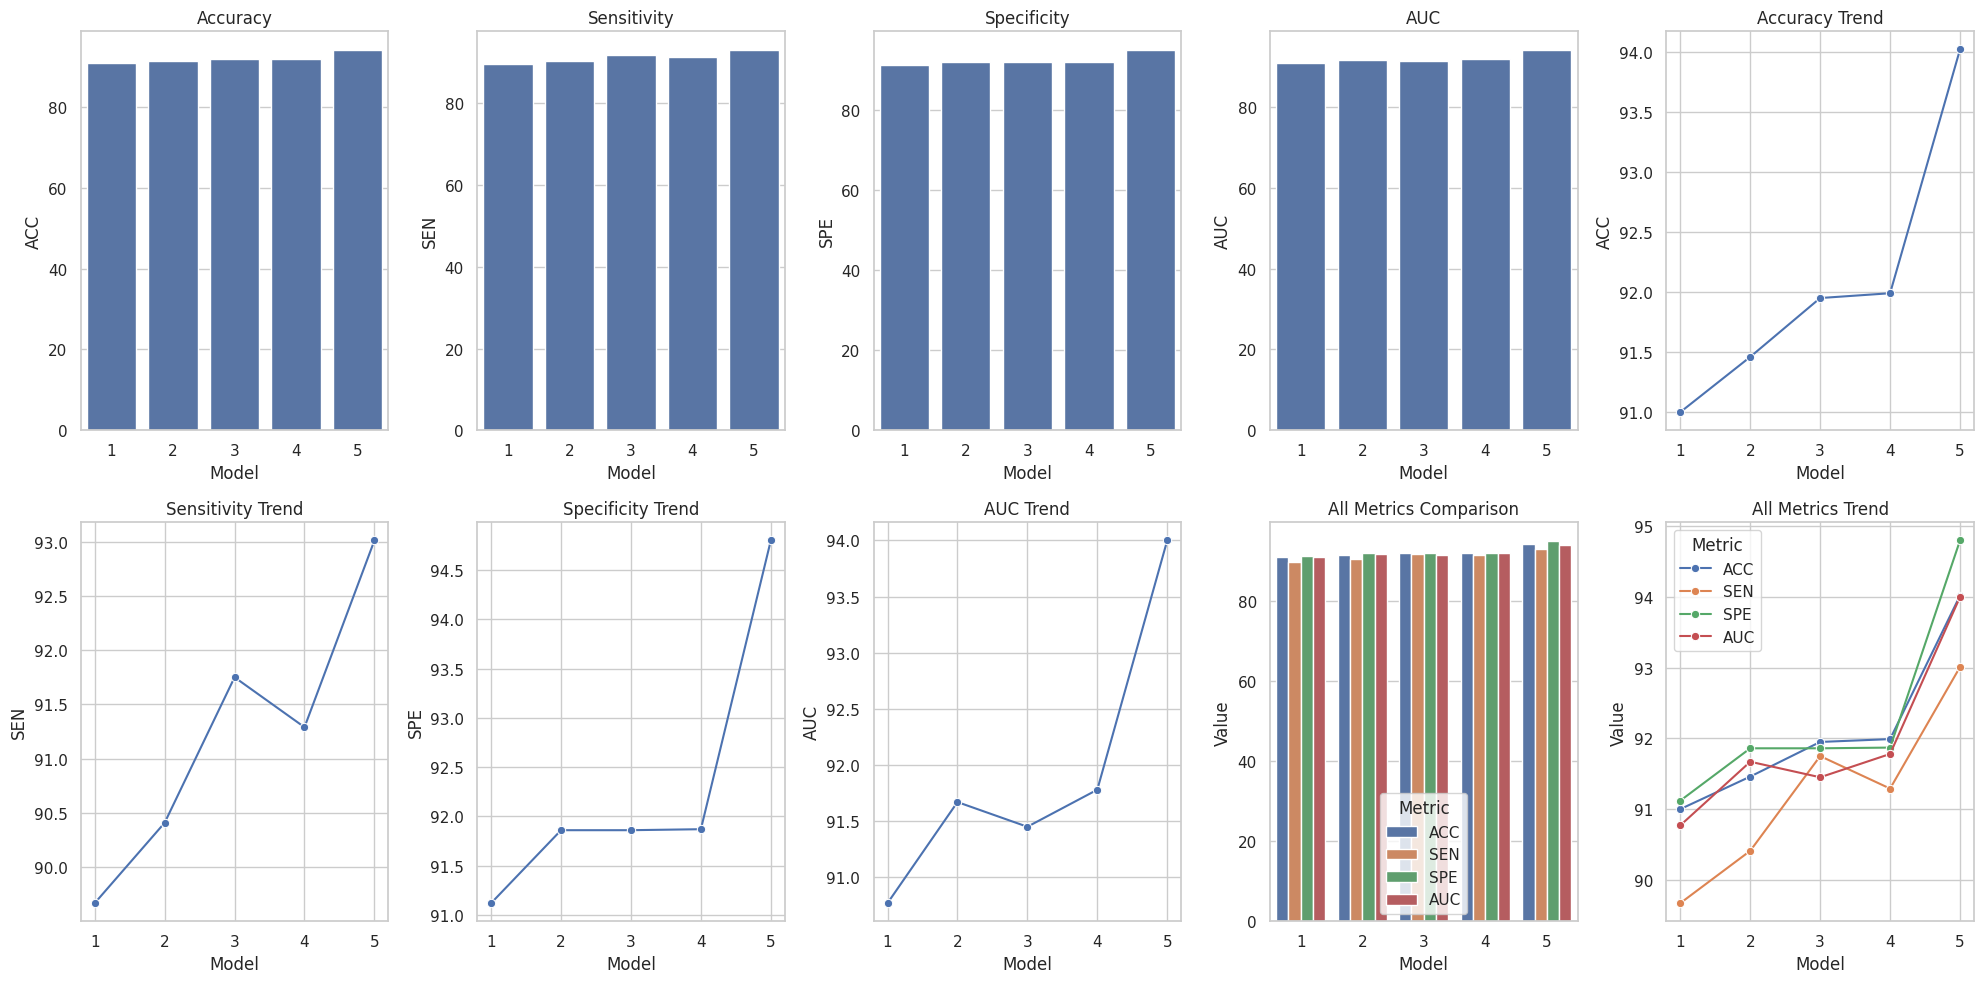

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Model': ['1', '2', '3', '4', '5'],
    'ACC': [91, 91.46, 91.95, 91.99, 94.02],
    'SEN': [89.67, 90.41, 91.75, 91.29, 93.01],
    'SPE': [91.12, 91.86, 91.86, 91.87, 94.8],
    'AUC': [90.77, 91.67, 91.45, 91.78, 94]
}

df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Accuracy
sns.barplot(x='Model', y='ACC', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')

# Sensitivity
sns.barplot(x='Model', y='SEN', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Sensitivity')

# Specificity
sns.barplot(x='Model', y='SPE', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Specificity')

# AUC
sns.barplot(x='Model', y='AUC', data=df, ax=axes[0, 3])
axes[0, 3].set_title('AUC')

# Line plots for trends
sns.lineplot(x='Model', y='ACC', data=df, marker='o', ax=axes[0, 4])
axes[0, 4].set_title('Accuracy Trend')

sns.lineplot(x='Model', y='SEN', data=df, marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Sensitivity Trend')

sns.lineplot(x='Model', y='SPE', data=df, marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Specificity Trend')

sns.lineplot(x='Model', y='AUC', data=df, marker='o', ax=axes[1, 2])
axes[1, 2].set_title('AUC Trend')

# Combined bar plot for all metrics
df_melted = df.melt(id_vars=['Model'], value_vars=['ACC', 'SEN', 'SPE', 'AUC'], var_name='Metric', value_name='Value')
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, ax=axes[1, 3])
axes[1, 3].set_title('All Metrics Comparison')

# Combined line plot for all metrics
sns.lineplot(x='Model', y='Value', hue='Metric', data=df_melted, marker='o', ax=axes[1, 4])
axes[1, 4].set_title('All Metrics Trend')

# Adjust layout
plt.tight_layout()
plt.show()


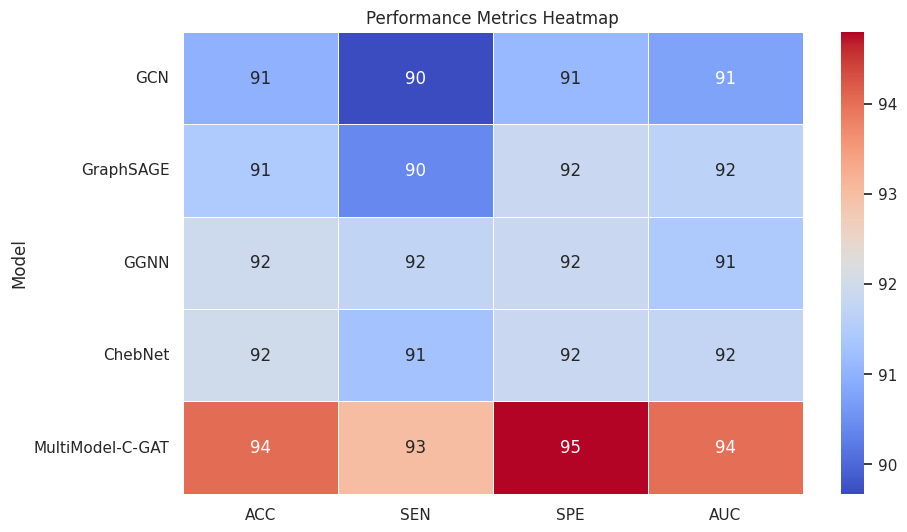

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Model': ['GCN', 'GraphSAGE', 'GGNN', 'ChebNet', 'MultiModel-C-GAT'],
    'ACC': [91, 91.46, 91.95, 91.99, 94.02],
    'SEN': [89.67, 90.41, 91.75, 91.29, 93.01],
    'SPE': [91.12, 91.86, 91.86, 91.87, 94.8],
    'AUC': [90.77, 91.67, 91.45, 91.78, 94]
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Performance Metrics Heatmap')
plt.show()


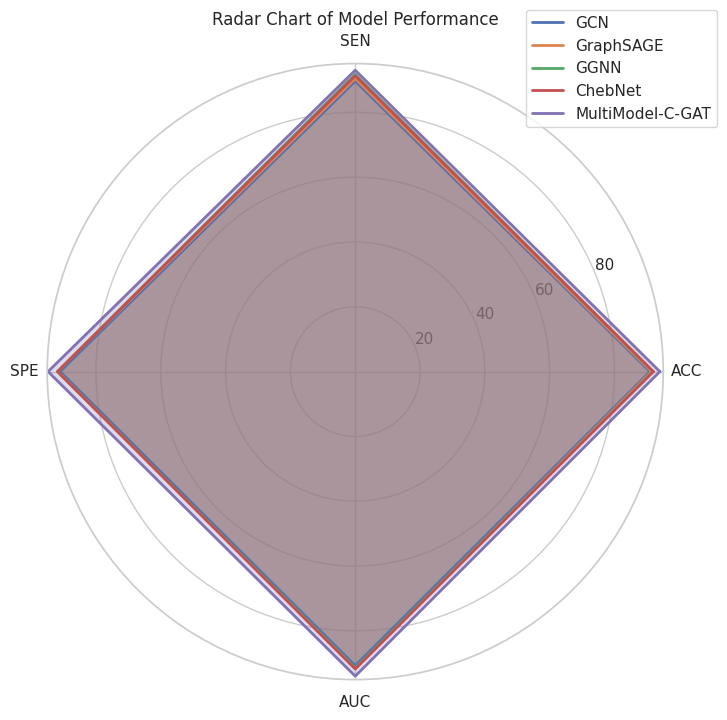

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Data
data = {
    'Model': ['GCN', 'GraphSAGE', 'GGNN', 'ChebNet', 'MultiModel-C-GAT'],
    'ACC': [91, 91.46, 91.95, 91.99, 94.02],
    'SEN': [89.67, 90.41, 91.75, 91.29, 93.01],
    'SPE': [91.12, 91.86, 91.86, 91.87, 94.8],
    'AUC': [90.77, 91.67, 91.45, 91.78, 94]
}

df = pd.DataFrame(data)

# Number of variables
categories = list(df.columns[1:])
N = len(categories)

# What will be the angle of each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop to plot each model
for i in range(len(df)):
    values = df.loc[i].drop('Model').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df['Model'][i])
    ax.fill(angles, values, alpha=0.25)

# Add labels
plt.xticks(angles[:-1], categories)
plt.title('Radar Chart of Model Performance')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


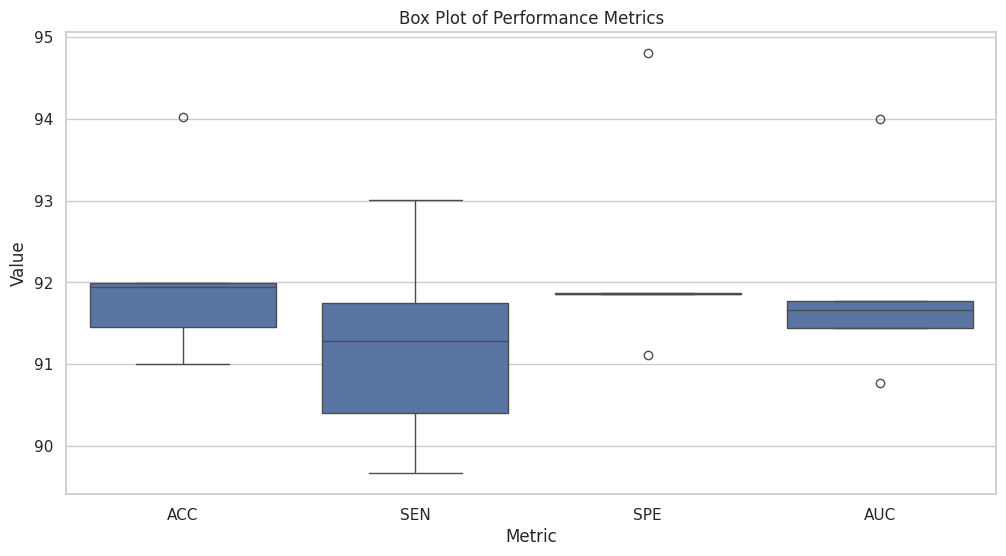

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Model': ['GCN', 'GraphSAGE', 'GGNN', 'ChebNet', 'MultiModel-C-GAT'],
    'ACC': [91, 91.46, 91.95, 91.99, 94.02],
    'SEN': [89.67, 90.41, 91.75, 91.29, 93.01],
    'SPE': [91.12, 91.86, 91.86, 91.87, 94.8],
    'AUC': [90.77, 91.67, 91.45, 91.78, 94]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars=['Model'], value_vars=['ACC', 'SEN', 'SPE', 'AUC'], var_name='Metric', value_name='Value')

# Plotting box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', data=df_melted)
plt.title('Box Plot of Performance Metrics')
plt.show()


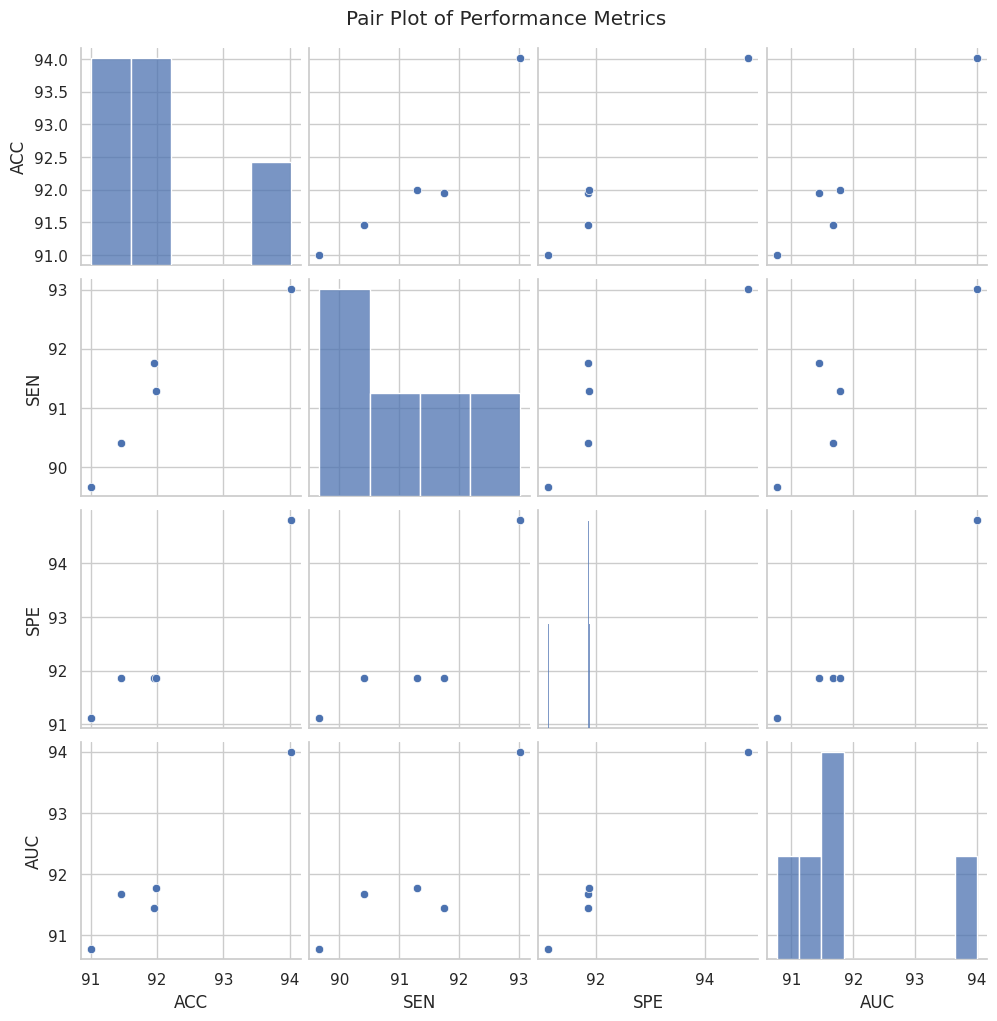

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Model': ['1', '2', '3', '4', '5'],
    'ACC': [91, 91.46, 91.95, 91.99, 94.02],
    'SEN': [89.67, 90.41, 91.75, 91.29, 93.01],
    'SPE': [91.12, 91.86, 91.86, 91.87, 94.8],
    'AUC': [90.77, 91.67, 91.45, 91.78, 94]
}

df = pd.DataFrame(data)

# Plotting pair plot
sns.pairplot(df.drop('Model', axis=1))
plt.suptitle('Pair Plot of Performance Metrics', y=1.02)
plt.show()


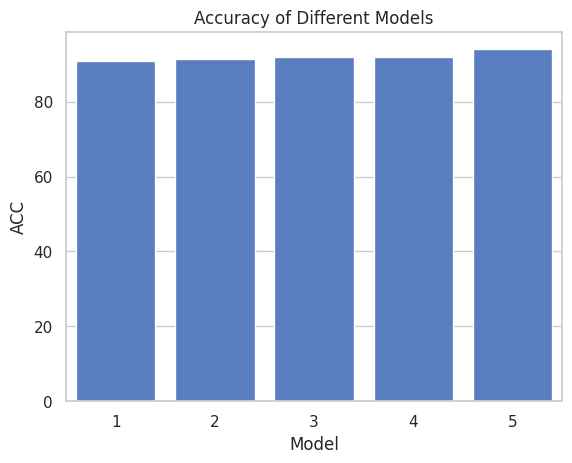

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set(style="whitegrid", palette="muted")

# Example plot
sns.barplot(x='Model', y='ACC', data=df)
plt.title('Accuracy of Different Models')
plt.show()


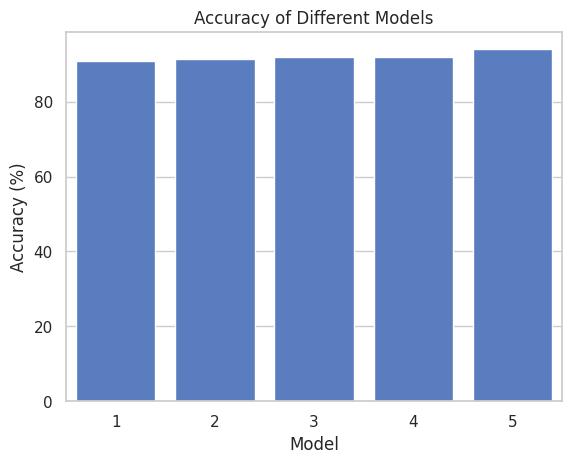

In [19]:
sns.barplot(x='Model', y='ACC', data=df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()


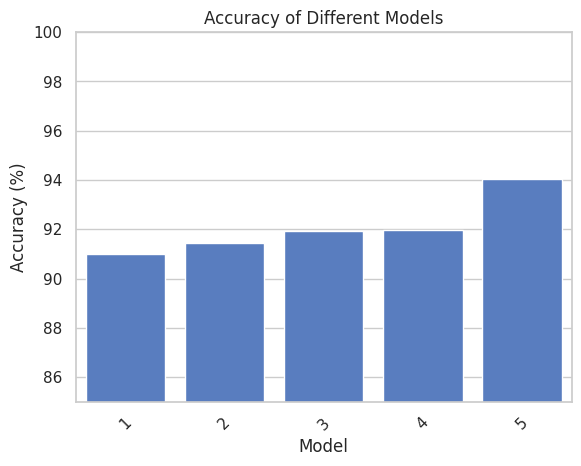

In [20]:
sns.barplot(x='Model', y='ACC', data=df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(85, 100)  # Set y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


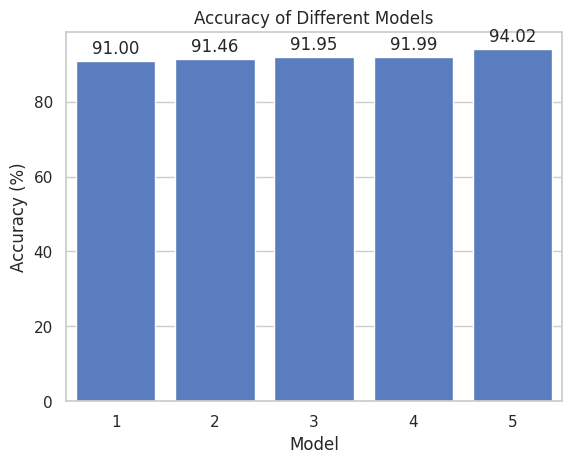

In [21]:
ax = sns.barplot(x='Model', y='ACC', data=df)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


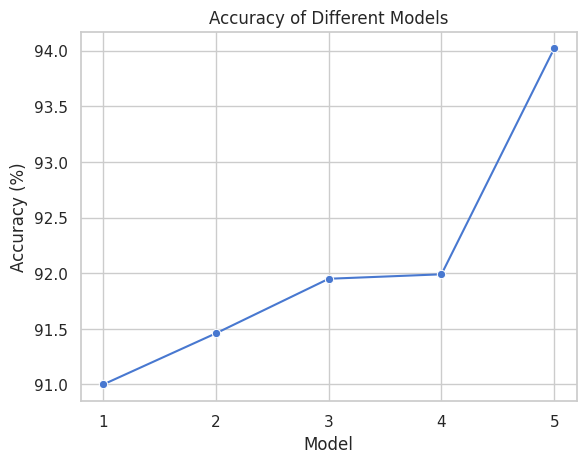

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


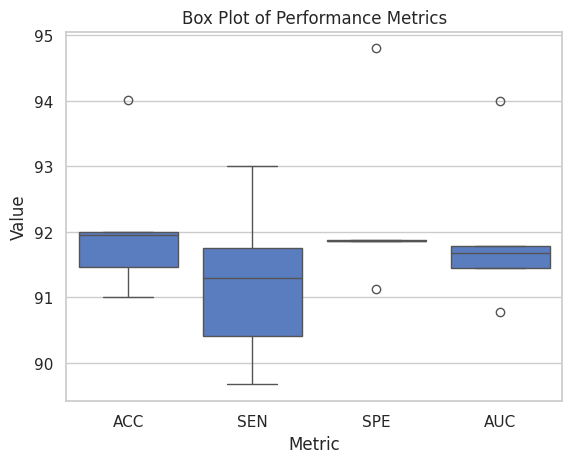

In [22]:
# Line plot
sns.lineplot(x='Model', y='ACC', data=df, marker='o')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()

# Box plot
sns.boxplot(x='Metric', y='Value', data=df_melted)
plt.title('Box Plot of Performance Metrics')
plt.show()
